In [ ]:
##Keras + Tensorflow for Deep Learning (Convolutional Neural Network)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # Updated import
from tensorflow.keras.utils import plot_model      # Updated import
from tensorflow.keras import regularizers

##PYWT for Wavelet transformation (denoising)
import pywt

##Scikit-learn for model stats & data splitting
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

##Matplotlib for visualization
import matplotlib.pyplot as plt

##OS level helper tools for data reading
import csv
import itertools
import numpy as np
import pandas as pd
import os
import collections

%matplotlib inline

In [ ]:
# from google.colab import files
# uploaded = files.upload()


Saving mitbih_database.zip to mitbih_database.zip


In [ ]:
# import zipfile
# import os

# with zipfile.ZipFile("mitbih_database.zip", 'r') as zip_ref:
#     zip_ref.extractall("mitbih_database")

# import os

# List inner folder contents correctly
# os.listdir("mitbih_database/mitbih_database")


FileNotFoundError: [Errno 2] No such file or directory: 'mitbih_database/mitbih_database'

In [ ]:
# import shutil

# nested_path = "mitbih_database/mitbih_database"
# for file in os.listdir(nested_path):
#     shutil.move(os.path.join(nested_path, file), "mitbih_database")

# os.rmdir(nested_path)  # delete the now-empty folder

# Now it's flat
# os.listdir("mitbih_database")


FileNotFoundError: [Errno 2] No such file or directory: 'mitbih_database'

In [ ]:
# # Install Kaggle API
# !pip install kaggle

# # Upload your kaggle.json credentials file
# # Then run:
# !mkdir -p ~/.kaggle && cp /content/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d shayanfazeli/heartbeat
# !unzip mitbih_database.zip -d ./input/mitbih_database/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/mitbih_database.zip -d /content/mitbih_database


Archive:  /content/drive/MyDrive/mitbih_database.zip
   creating: /content/mitbih_database/mitbih_database/
  inflating: /content/mitbih_database/mitbih_database/100.csv  
  inflating: /content/mitbih_database/mitbih_database/100annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/101.csv  
  inflating: /content/mitbih_database/mitbih_database/101annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/102.csv  
  inflating: /content/mitbih_database/mitbih_database/102annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/103.csv  
  inflating: /content/mitbih_database/mitbih_database/103annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/104.csv  
  inflating: /content/mitbih_database/mitbih_database/104annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/105.csv  
  inflating: /content/mitbih_database/mitbih_database/105annotations.txt  
  inflating: /content/mitbih_database/mitbih_database/106.

In [ ]:
import os
os.listdir('/content/mitbih_database/mitbih_database')

['209.csv',
 '122.csv',
 '119annotations.txt',
 '212annotations.txt',
 '106annotations.txt',
 '124annotations.txt',
 '210.csv',
 '115annotations.txt',
 '123.csv',
 '213annotations.txt',
 '212.csv',
 '201.csv',
 '104annotations.txt',
 '121annotations.txt',
 '111.csv',
 '207annotations.txt',
 '205annotations.txt',
 '200.csv',
 '214annotations.txt',
 '209annotations.txt',
 '111annotations.txt',
 '231annotations.txt',
 '114annotations.txt',
 '108annotations.txt',
 '202.csv',
 '202annotations.txt',
 '105.csv',
 '100annotations.txt',
 '228annotations.txt',
 '124.csv',
 '105annotations.txt',
 '221.csv',
 '221annotations.txt',
 '215.csv',
 '116.csv',
 '114.csv',
 '108.csv',
 '234annotations.txt',
 '119.csv',
 '223annotations.txt',
 '220annotations.txt',
 '113annotations.txt',
 '201annotations.txt',
 '231.csv',
 '109annotations.txt',
 '118annotations.txt',
 '102.csv',
 '219.csv',
 '223.csv',
 '117annotations.txt',
 '217.csv',
 '232.csv',
 '122annotations.txt',
 '228.csv',
 '203.csv',
 '217annot

Helper Functions

In [ ]:
## Let's set some parameters for our visualization
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1

In [ ]:
## Defining the denoising function
def denoise(data):
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

    datarec = pywt.waverec(coeffs, 'sym4')

    return datarec

In [ ]:
path = '/content/mitbih_database/mitbih_database'
print("Files in path:", os.listdir(path))

Files in path: ['209.csv', '122.csv', '119annotations.txt', '212annotations.txt', '106annotations.txt', '124annotations.txt', '210.csv', '115annotations.txt', '123.csv', '213annotations.txt', '212.csv', '201.csv', '104annotations.txt', '121annotations.txt', '111.csv', '207annotations.txt', '205annotations.txt', '200.csv', '214annotations.txt', '209annotations.txt', '111annotations.txt', '231annotations.txt', '114annotations.txt', '108annotations.txt', '202.csv', '202annotations.txt', '105.csv', '100annotations.txt', '228annotations.txt', '124.csv', '105annotations.txt', '221.csv', '221annotations.txt', '215.csv', '116.csv', '114.csv', '108.csv', '234annotations.txt', '119.csv', '223annotations.txt', '220annotations.txt', '113annotations.txt', '201annotations.txt', '231.csv', '109annotations.txt', '118annotations.txt', '102.csv', '219.csv', '223.csv', '117annotations.txt', '217.csv', '232.csv', '122annotations.txt', '228.csv', '203.csv', '217annotations.txt', '102annotations.txt', '107.

In [ ]:
##Retrieve the data!
path = '/content/mitbih_database/mitbih_database/'
window_size = 180
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

In [ ]:
# !pip install keras tensorflow PyWavelets scipy scikit-learn matplotlib numpy pandas

In [ ]:
import os, csv, itertools, collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy import stats
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Dropout
import tensorflow as tf

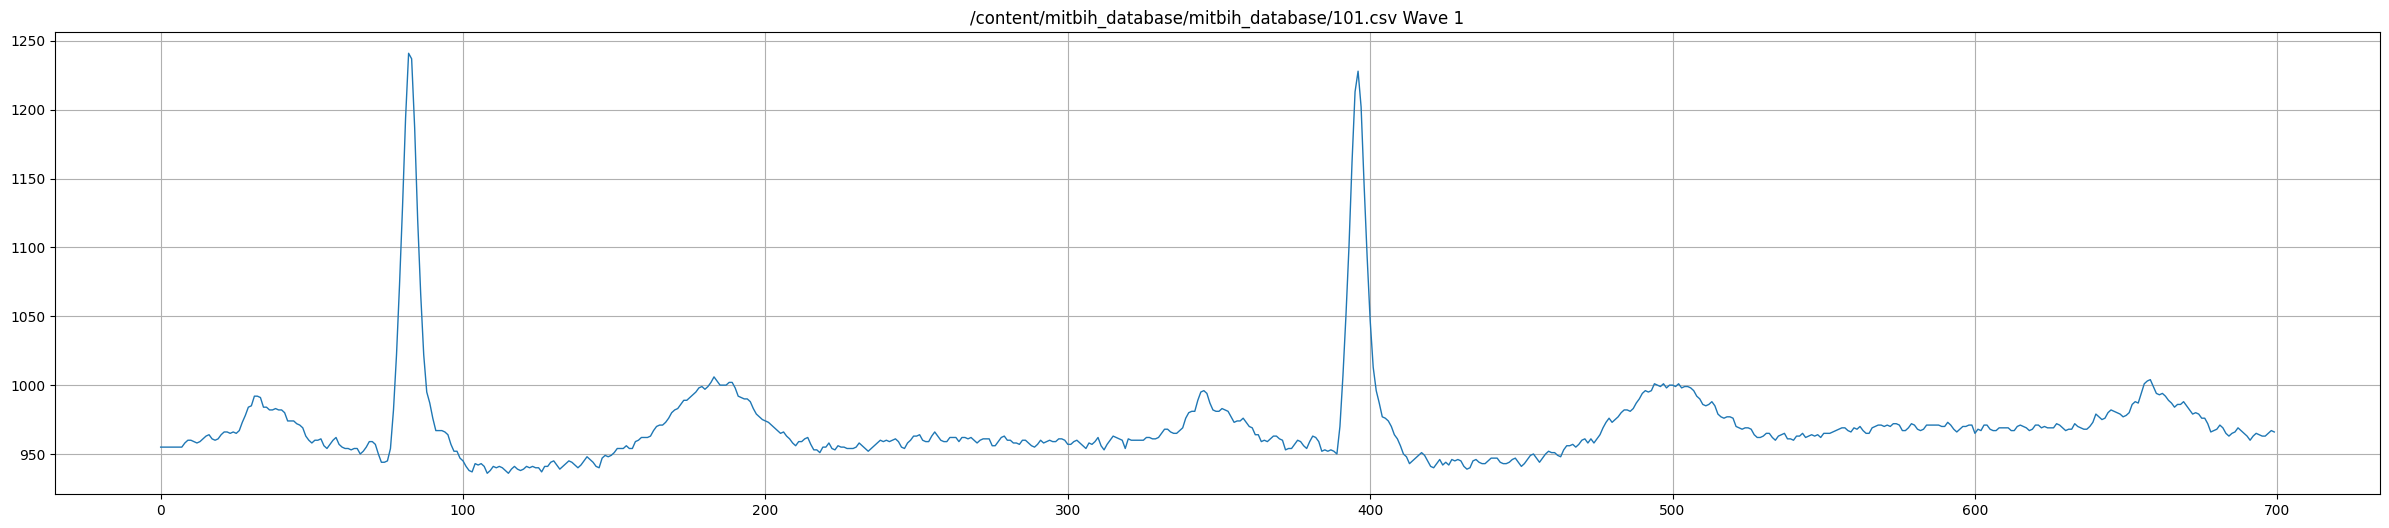

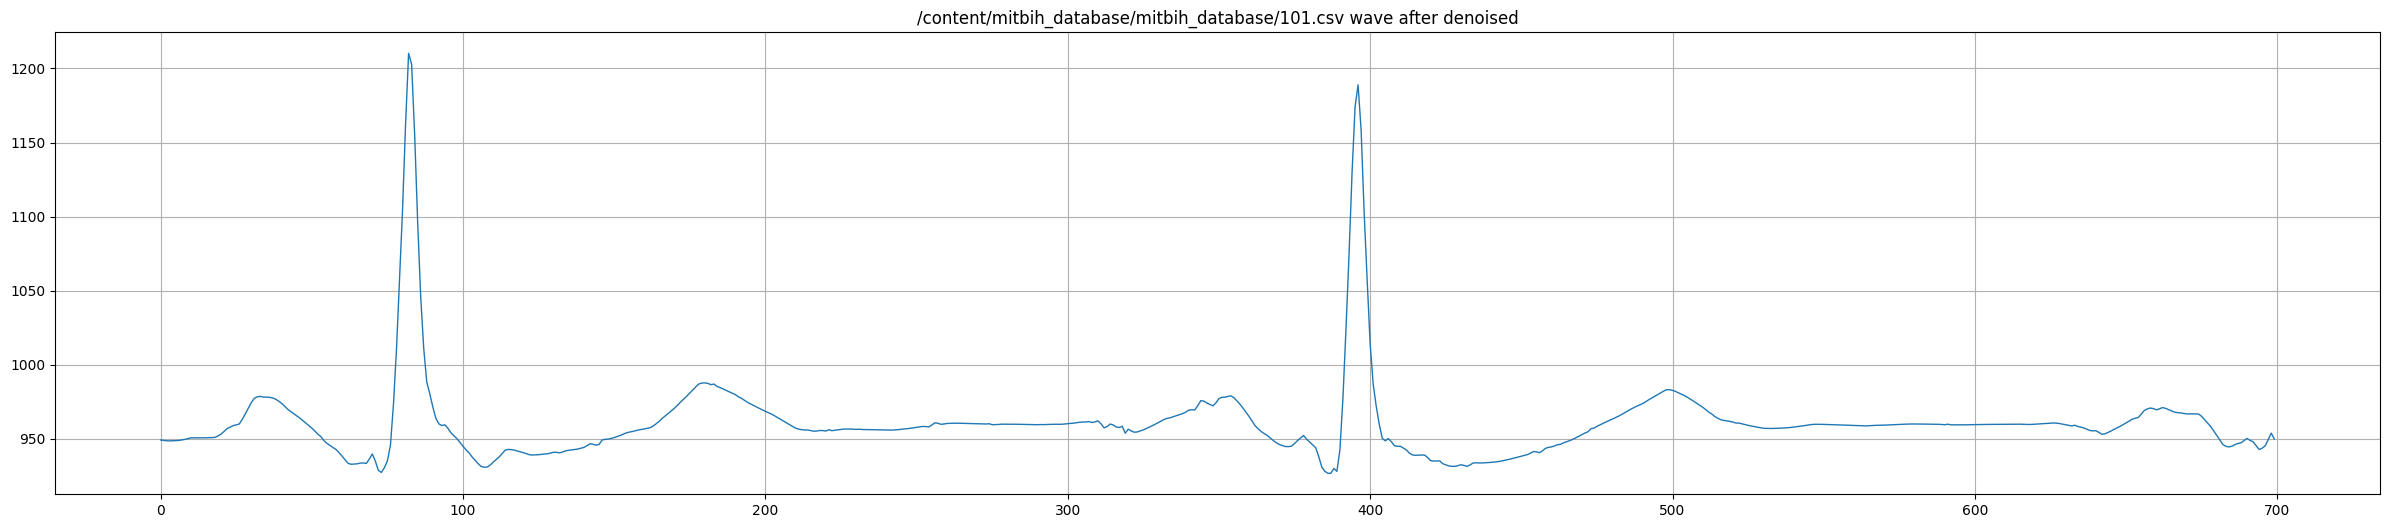

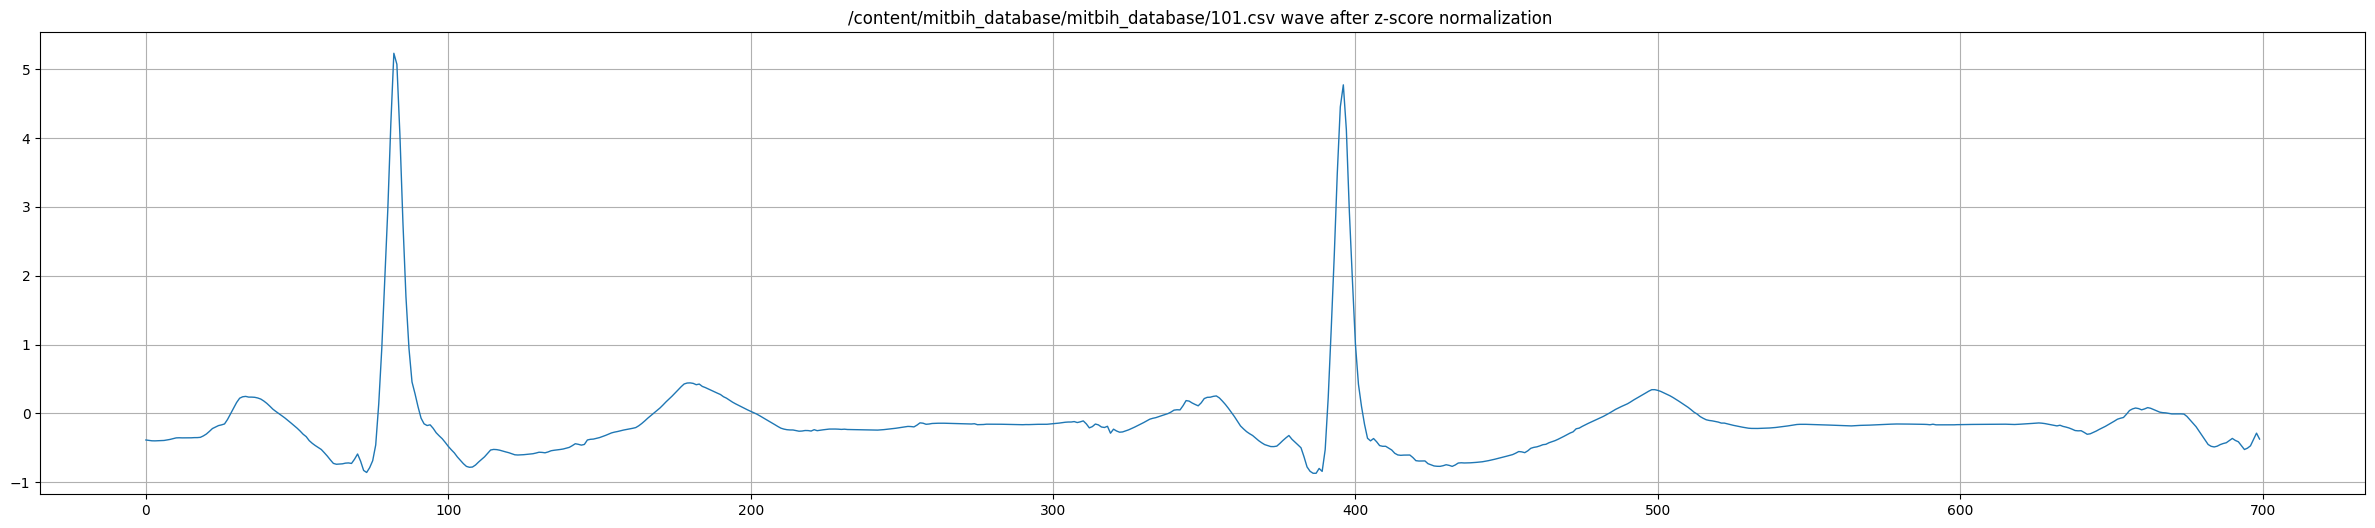

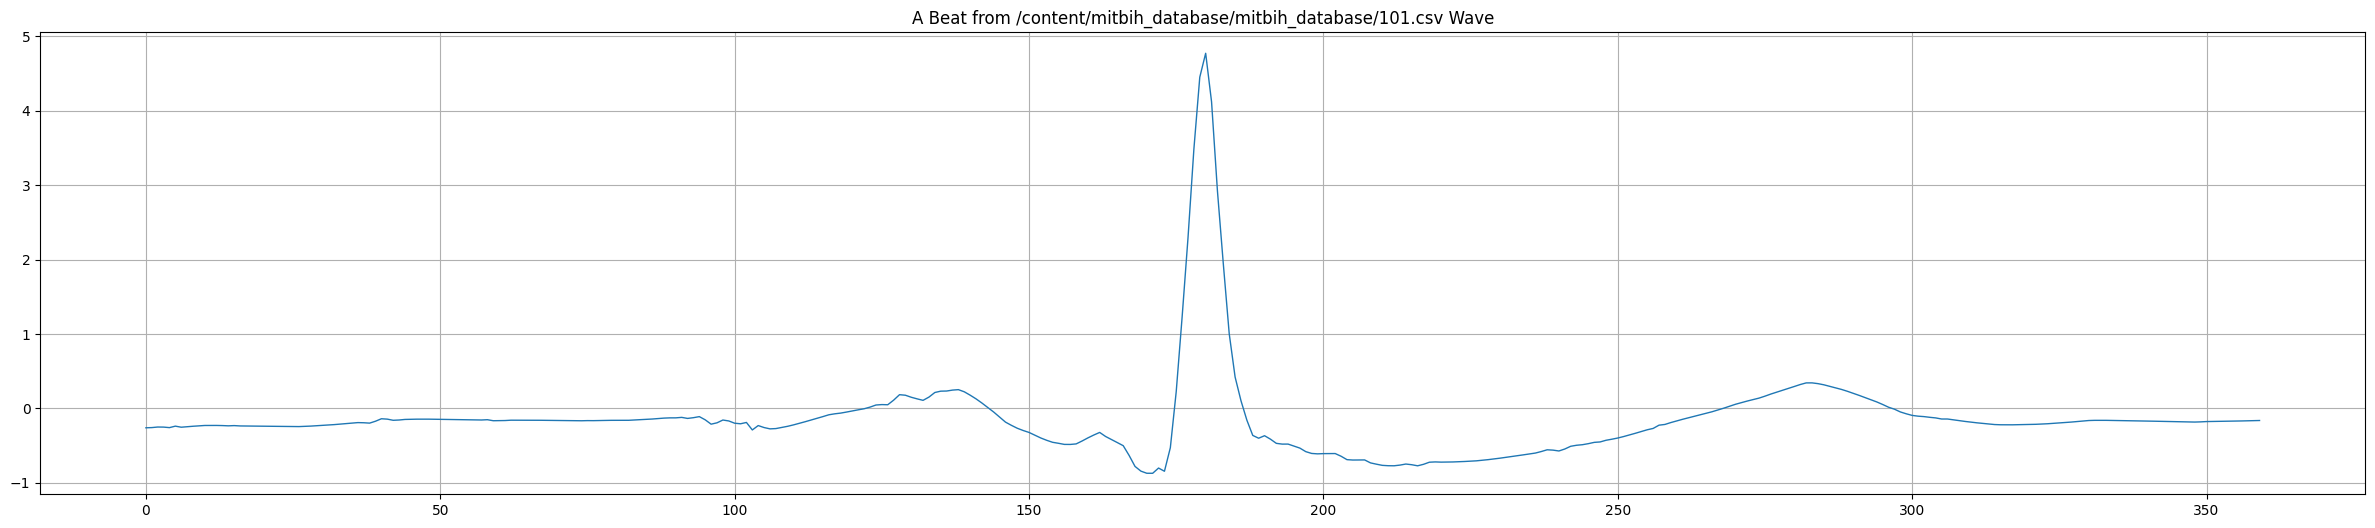

(100012, 360) (100012,)


In [ ]:
# Read files
filenames = next(os.walk(path))[2]

# Split and save .csv , .txt
records = list()
annotations = list()
filenames.sort()

# separate filenames and annotations
for f in filenames:
    filename, file_extension = os.path.splitext(f)

    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

# Create DataRecords
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    # Plot an example to the signals
    if r == 1:
        # Plot each patient's signal
        plt.title(records[1] + " Wave 1")
        plt.plot(signals[0:700])
        plt.show()

    signals = denoise(signals)
    # Plot an example to the signals
    if r == 1:
        # Plot each patient's signal
        plt.title(records[1] + " wave after denoised")
        plt.plot(signals[0:700])
        plt.show()

    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r == 1:
        # Plot each patient's signal
        plt.title(records[1] + " wave after z-score normalization ")
        plt.plot(signals[0:700])
        plt.show()

    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ')
            splitted = list(filter(None, splitted)) # Convert filter object to list
            if len(splitted) >= 3: # Check if there are enough elements
                # Access elements by index instead of using next()
                pos = int(splitted[1]) # Sample ID is the second element
                arrhythmia_type = splitted[2] # Type is the third element
                if(arrhythmia_type in classes):
                    arrhythmia_index = classes.index(arrhythmia_type)
    #                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
    #                     pass
    #                 else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size <= pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size:pos+window_size]
                        # Plot an example to a beat
                        if r == 1 and not example_beat_printed:
                            plt.title("A Beat from " + records[1] + " Wave")
                            plt.plot(beat)
                            plt.show()
                            example_beat_printed = True

                        X.append(beat)
                        y.append(arrhythmia_index)
            else:
                print(f"Skipping line {d} in file {annotations[r]} due to insufficient elements: {data[d]}")


# data shape
print(np.shape(X), np.shape(y))

In [ ]:
for i in range(0,len(X)):
        X[i] = np.append(X[i], y[i])

print(np.shape(X))

(100012, 361)


360
0.0    75011
1.0     8071
2.0     7255
4.0     7129
3.0     2546
Name: count, dtype: int64


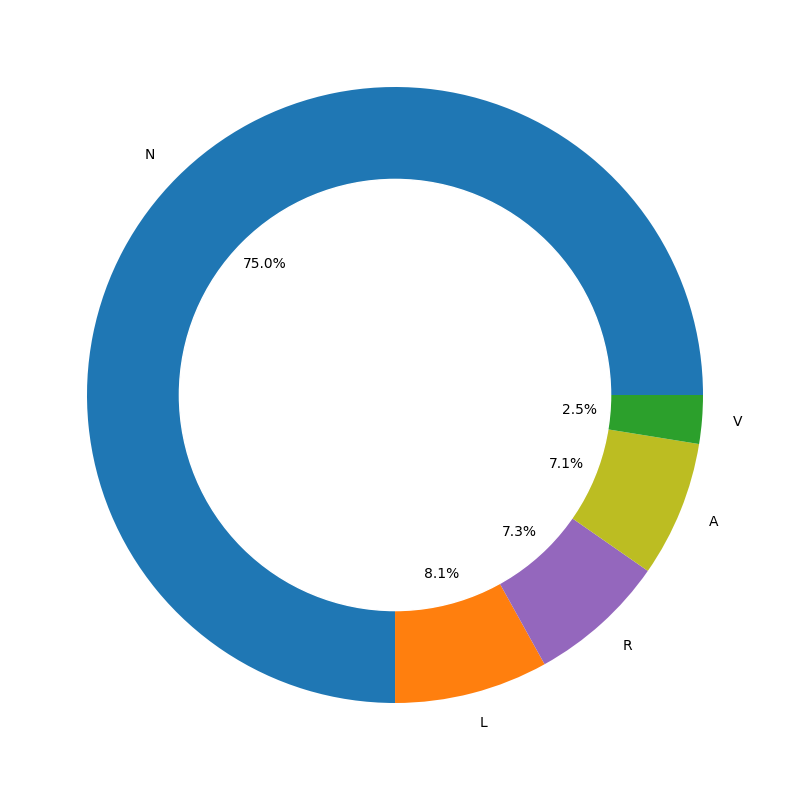

In [ ]:
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
print(X_train_df.columns)


RangeIndex(start=0, stop=361, step=1)


In [ ]:
X_train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,0.018228,0.022953,0.058424,0.077107,0.095080,0.105492,0.112325,0.116982,0.119703,0.122254,...,-0.013640,-0.013518,-0.012969,-0.010249,-0.013186,-0.027581,0.010994,-0.026885,-0.020095,0.0
1,-0.366827,-0.344524,-0.320039,-0.330324,-0.299629,-0.292238,-0.283900,-0.275759,-0.267345,-0.257942,...,-0.140611,-0.140669,-0.140735,-0.141352,-0.140082,-0.136719,-0.144822,-0.139946,-0.142478,0.0
2,-0.171359,-0.140344,-0.109854,-0.078079,-0.048978,-0.034990,-0.028194,-0.024550,-0.024222,-0.023859,...,0.001325,0.007875,0.015828,0.025088,0.030657,0.026670,0.056487,0.028112,0.028259,0.0
3,-0.186526,-0.182575,-0.177326,-0.171800,-0.165320,-0.158725,-0.151677,-0.144942,-0.140875,-0.138009,...,0.021386,0.032036,0.043188,0.058269,0.074966,0.076706,0.073569,0.093104,0.116388,0.0
4,-0.369240,-0.368380,-0.344557,-0.314211,-0.295571,-0.279271,-0.261415,-0.243202,-0.221928,-0.200658,...,-0.019342,-0.014265,-0.009238,-0.004046,0.001153,0.006449,0.011785,0.016524,0.021073,0.0


In [ ]:
X_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100012 entries, 0 to 100011
Columns: 361 entries, 0 to 360
dtypes: float64(361)
memory usage: 275.5 MB


Data preprocessing

360
0.0    5000
1.0    5000
2.0    5000
3.0    5000
4.0    5000
Name: count, dtype: int64


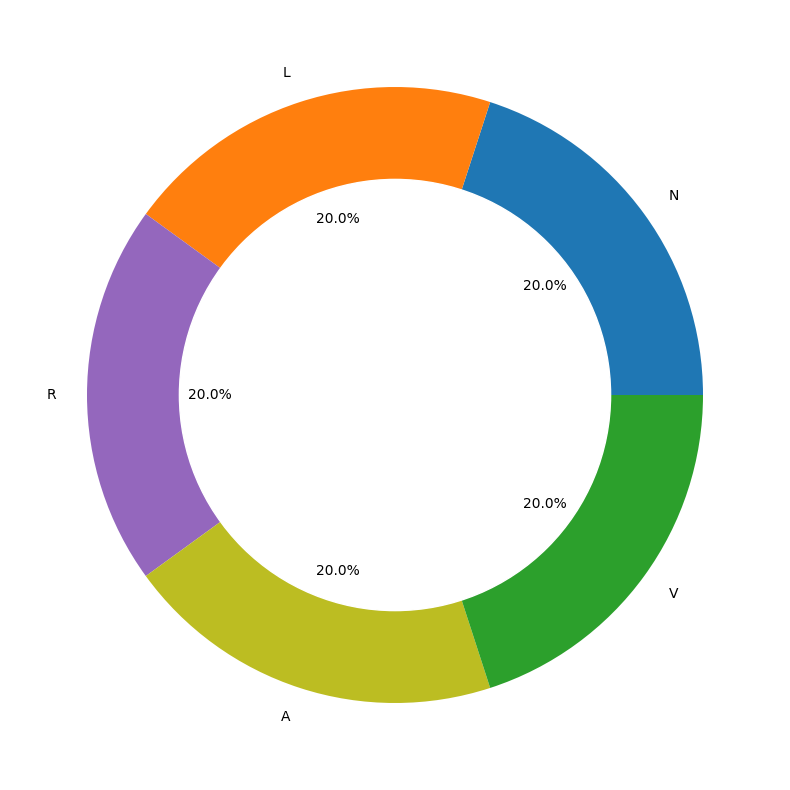

In [ ]:

df_1=X_train_df[X_train_df[X_train_df.shape[1]-1]==1]
df_2=X_train_df[X_train_df[X_train_df.shape[1]-1]==2]
df_3=X_train_df[X_train_df[X_train_df.shape[1]-1]==3]
df_4=X_train_df[X_train_df[X_train_df.shape[1]-1]==4]
df_0=(X_train_df[X_train_df[X_train_df.shape[1]-1]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))

target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

X_train :  (20000, 361)
X_test  :  (5000, 361)
(20000, 5) (5000, 5)
(20000, 360, 1) (5000, 360, 1)



## Model Building
# # Model - 1

In [ ]:
# # Create a CNN
# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(360, 1)))
# model.add(AvgPool1D(pool_size=3, strides=2))
# model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))
# model.add(AvgPool1D(pool_size=3, strides=2))
# model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
# model.add(AvgPool1D(pool_size=3, strides=2))
# model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
# model.add(AvgPool1D(pool_size=3, strides=2))
# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
# model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
# model.add(Softmax())


# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 360, 16)        │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 179, 16)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 179, 32)        │         7,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 89, 32)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 89, 64)         │        34,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_2             │ (None, 44, 64)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 44, 128)        │       155,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_3             │ (None, 21, 128)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 35)             │        94,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,887 (1.12 MB)

 Trainable params: 292,887 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

# # Model 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HeartNetIEEE(nn.Module):
    def __init__(self, num_classes=5):  # You’re using 5 classes now
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.Conv1d(64, 64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2),
            nn.Conv1d(64, 128, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.Conv1d(128, 128, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2),
        )

        # Dynamically determine flattened size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 360)  # your real input length
            out = self.features(dummy_input)
            self.flattened_size = out.view(1, -1).shape[1]

        self.classifier = nn.Sequential(
            nn.Linear(self.flattened_size, 256),
            nn.Linear(256, 128),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
model = HeartNetIEEE(num_classes=5)
# model.summary()

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

# Loss function for multi-class classification
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert numpy arrays to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32).permute(0, 2, 1)  # [N, 1, 140]
train_y_tensor = torch.tensor(np.argmax(train_y, axis=1), dtype=torch.long)
test_x_tensor = torch.tensor(test_x, dtype=torch.float32).permute(0, 2, 1)
test_y_tensor = torch.tensor(np.argmax(test_y, axis=1), dtype=torch.long)

# Create Dataset & Dataloader
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
test_dataset = TensorDataset(test_x_tensor, test_y_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training settings
num_epochs = 25
best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss
    train_acc = 100. * correct / total

    # 🔹 Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100. * val_correct / val_total

    # Logging
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    scheduler.step(val_loss)

    # 🔹 Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# 🟩 Load best model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# ✅ Final Evaluation
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

Epoch 1/25 | Train Loss: 227.2562, Train Acc: 88.31% | Val Loss: 36.0197, Val Acc: 92.70%
Epoch 2/25 | Train Loss: 102.4745, Train Acc: 94.52% | Val Loss: 24.9980, Val Acc: 94.62%
Epoch 3/25 | Train Loss: 74.9228, Train Acc: 95.95% | Val Loss: 27.9829, Val Acc: 94.72%
Epoch 4/25 | Train Loss: 68.2720, Train Acc: 96.30% | Val Loss: 21.3898, Val Acc: 96.20%
Epoch 5/25 | Train Loss: 54.1454, Train Acc: 96.97% | Val Loss: 24.3680, Val Acc: 95.52%
Epoch 6/25 | Train Loss: 48.1529, Train Acc: 97.41% | Val Loss: 19.3164, Val Acc: 96.86%
Epoch 7/25 | Train Loss: 45.8011, Train Acc: 97.48% | Val Loss: 20.7229, Val Acc: 96.78%
Epoch 8/25 | Train Loss: 38.5289, Train Acc: 97.92% | Val Loss: 17.3244, Val Acc: 97.00%
Epoch 9/25 | Train Loss: 36.7934, Train Acc: 98.02% | Val Loss: 16.1803, Val Acc: 97.20%
Epoch 10/25 | Train Loss: 30.5622, Train Acc: 98.36% | Val Loss: 20.2795, Val Acc: 96.78%
Epoch 11/25 | Train Loss: 32.0710, Train Acc: 98.17% | Val Loss: 14.5530, Val Acc: 97.46%
Epoch 12/25 | Tra

## Step 5 - Model Training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, batch_size=36, epochs=60, verbose=1, validation_data=(test_x, test_y))

Epoch 1/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 66s 109ms/step - accuracy: 0.7880 - loss: 0.5716 - val_accuracy: 0.9586 - val_loss: 0.1438
Epoch 2/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 57s 103ms/step - accuracy: 0.9559 - loss: 0.1452 - val_accuracy: 0.9654 - val_loss: 0.1085
Epoch 3/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.9672 - loss: 0.1079 - val_accuracy: 0.9750 - val_loss: 0.0869
Epoch 4/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9751 - loss: 0.0878 - val_accuracy: 0.9758 - val_loss: 0.0862
Epoch 5/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 48s 86ms/step - accuracy: 0.9759 - loss: 0.0899 - val_accuracy: 0.9776 - val_loss: 0.0851
Epoch 6/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 46s 83ms/step - accuracy: 0.9810 - loss: 0.0733 - val_accuracy: 0.9816 - val_loss: 0.0727
Epoch 7/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9842 - loss: 0.0642 - val_accuracy: 0.9794 - val_loss: 0.0776
Epoch 8/60
556/556 ━━━━━━━━━━━━━━━━━━━━ 47s 85ms/step - accuracy: 0.9842 - loss: 0.0619 

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

## Step 6 - Model Evaluation

In [ ]:
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

AttributeError: 'HeartNetIEEE' object has no attribute 'evaluate'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [ ]:
# Predict probabilities
pred_probs = model.predict(test_x)

# Get predicted class labels
y_pred = np.argmax(pred_probs, axis=1)

# Get true class labels
y_true = np.argmax(test_y, axis=1)  # Because test_y is one-hot encoded


157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['N', 'L', 'R', 'A', 'V']))


Classification Report:
              precision    recall  f1-score   support

           N       0.98      0.99      0.99       979
           L       1.00      1.00      1.00      1006
           R       1.00      1.00      1.00      1047
           A       0.99      0.99      0.99       973
           V       1.00      0.99      0.99       995

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



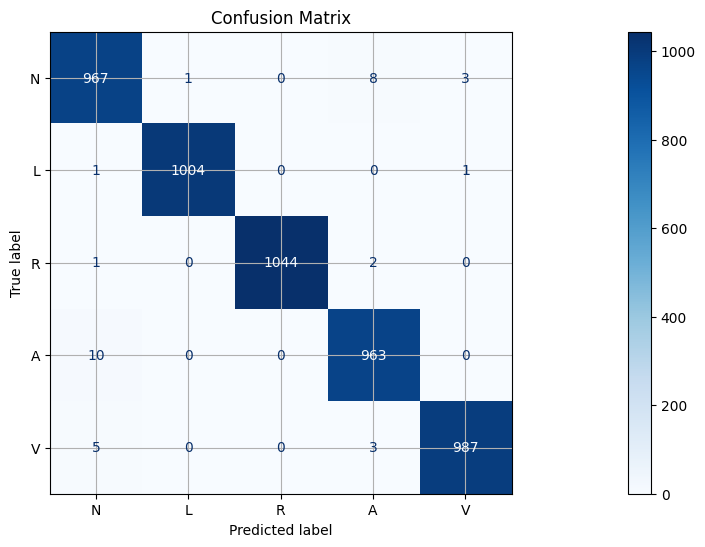

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['N', 'L', 'R', 'A', 'V'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
